<a href="https://colab.research.google.com/github/andrecsq/trabalho_simulacao/blob/main/TrabalhoAD_Simulacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Implementação Eventos

In [170]:
import queue
from dataclasses import dataclass, field

@dataclass(order=True)
class Event:
  time: float
  event_type: str=field(compare=False)

In [171]:
def generate_infection(t, rate, infected, population):
    susceptible = population - infected
    beta_i = rate * infected * susceptible / population
    infection_time = np.random.exponential(1/beta_i) 
    infection_event = Event(t + infection_time, 'infection')
    return infection_event

def generate_cure(t, rate, infected):
    gamma_i = rate * infected
    cure_time = np.random.exponential(1/gamma_i) 
    cure_event = Event(t + cure_time, 'cure')
    return cure_event

def initialize_queue(initial_beta, initial_gamma, total_population, initial_infected):
  q = queue.PriorityQueue()

  for i in range(initial_infected):
    q.put(generate_cure(0, initial_gamma, initial_infected))
    q.put(generate_infection(0, initial_beta, initial_infected, total_population))
  
  return q

In [222]:
def simulate_epidemic(initial_beta, initial_gamma, total_population, initial_infected, max_time):
  q = initialize_queue(initial_beta, initial_gamma, total_population, initial_infected)
  curr_infected = initial_infected
  curr_time = 0
  times = []
  amount_infected = []


  # 2 elementos:
  # cura
  # infecção <-

while not q.empty(): 
  e = q.get() # Event(time=float, event_type=enum('cure', 'infection'))
  curr_time = e.time
  
  # se tem 0 infectados ou passou o tempo, retorna
  if curr_infected == 0 or e.time > max_time: 
    return times, amount_infected
  elif e.event_type == 'infection' and curr_infected < total_population:
    # Aqui sabemos que, caso toda a população esteja infectada, 
    # não é mais agendado evento de infecção
    curr_infected += 1
    q.put(generate_infection(curr_time, initial_beta, curr_infected, total_population))
  elif e.event_type == 'cure':
    # Quando infectamos a população inteira, além da cura, também geramos
    # Um novo evento de infecção é gerado SE o evento de infecção acima não estiver agendado
    if curr_infected == total_population and q.empty():
      q.put(generate_infection(curr_time, initial_beta, curr_infected - 1, total_population))
    curr_infected -= 1
    q.put(generate_cure(curr_time, initial_gamma, curr_infected))

  times.append(e.time)
  amount_infected.append(curr_infected)

return times, amount_infected

In [223]:
beta = 0.5
gamma = 0.1

total_population = 200
initial_infected = 10
max_time = 50

num_simulations = 10


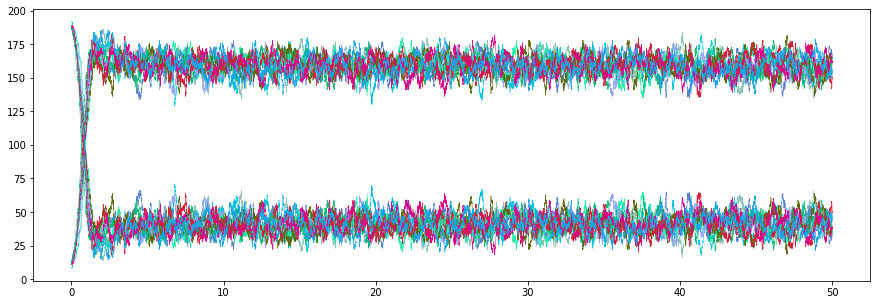

In [226]:
total_infected_all = []
total_infected_stationary = []

for i in range(num_simulations):
  events = []

  times, amount_infected = simulate_epidemic(beta, 
                                             gamma, 
                                             total_population,
                                             initial_infected,
                                             max_time)
  amount_susceptible = total_population - np.array(amount_infected)
  new_times = np.array(times)

  total_infected_all += amount_infected
  total_infected_stationary += amount_infected[5000:]

  random_color = c=np.random.rand(3,)
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(15, 5)

  linewidth = 0.5
  plt.plot(new_times, amount_susceptible, color=random_color, linewidth=linewidth)
  plt.plot(new_times, amount_infected, color=random_color, linewidth=linewidth)


In [227]:
sample_avg = np.average(total_infected_all)
sample_std = np.std(total_infected_all)
n_samples = len(total_infected_all)

dec = 2
print(f"Average: {round(sample_avg, dec)}")
print(f"Std Deviation: {round(sample_std, dec)}")
ls = sample_avg + 1.96 * sample_std / (n_samples)**(1/2) 
li = sample_avg - 1.96 * sample_std / (n_samples)**(1/2)
print(f"Conf Interval (95%): ({round(li, dec)}, {round(ls, dec)})")

Average: 158.05
Std Deviation: 12.16
Conf Interval (95%): (157.99, 158.11)


In [228]:
sample_avg = np.average(total_infected_stationary)
sample_std = np.std(total_infected_stationary)
n_samples = len(total_infected_stationary)

dec = 2
print(f"Average: {round(sample_avg, dec)}") 
print(f"Std Deviation: {round(sample_std, dec)}")
ls = sample_avg + 1.96 * sample_std / (n_samples)**(1/2) 
li = sample_avg - 1.96 * sample_std / (n_samples)**(1/2)
print(f"Conf Interval (95%): ({round(li, dec)}, {round(ls, dec)})")

Average: 158.7
Std Deviation: 7.04
Conf Interval (95%): (158.66, 158.74)
